# Random Forest:
Los árboles de decisión son modelos predictivos formados por reglas binarias (si/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta.

Un modelo Random Forest está formado por un conjunto (ensemble) de árboles de decisión individuales, cada uno entrenado con una muestra aleatoria extraída de los datos de entrenamiento originales mediante bootstrapping. Esto implica que cada árbol se entrena con unos datos ligeramente distintos. En cada árbol individual, las observaciones se van distribuyendo por bifurcaciones (nodos) generando la estructura del árbol hasta alcanzar un nodo terminal. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

Para entender cómo funcionan los modelos Random Forest es necesario conocer primero los conceptos de ensemble y bagging:

__Los métodos de ensemble__ combinan múltiples modelos en uno nuevo con el objetivo de lograr un equilibro entre bias y varianza, consiguiendo así mejores predicciones que cualquiera de los modelos individuales originales. Dos de los tipos de ensemble más utilizados son:

 - Bagging: Se ajustan múltiples modelos, cada uno con un subconjunto distinto de los datos de entrenamiento. Para predecir, todos los modelos que forman el agregado participan aportando su predicción. Como valor final, se toma la media de todas las predicciones (variables continuas) o la clase más frecuente (variables categóricas). Los modelos Random Forest están dentro de esta categoría.

 - Boosting: Se ajustan secuencialmente múltiples modelos sencillos, llamados weak learners, de forma que cada modelo aprende de los errores del anterior. Como valor final, al igual que en bagging, se toma la media de todas las predicciones (variables continuas) o la clase más frecuente (variables cualitativas). Tres de los métodos de boosting más empleados son AdaBoost, Gradient Boosting y Stochastic Gradient Boosting.
 
__El término bagging__ es el diminutivo de bootstrap aggregation, y hace referencia al empleo del muestreo repetido con reposición bootstrapping con el fin de reducir la varianza de algunos modelos de aprendizaje estadístico, entre ellos los basados en árboles. En el proceso de bagging, el número de árboles creados no es un hiperparámetro crítico en cuanto a que, por mucho que se incremente el número, no se aumenta el riesgo de overfitting. Alcanzado un determinado número de árboles, la reducción de test error se estabiliza. A pesar de ello, cada árbol ocupa memoria, por lo que no conviene almacenar más de los necesarios.

- Library Import
- Data Import
- Model Definition
- Model Training
- Confussion Matrix & Accuracy
- ROC Curve
- References

### En este notebook vamos a tratar un modelo Bagging: Random Forest

__Importamos las librerías:__

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing 
from sklearn.linear_model import Lasso, LassoCV
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression # Log Regression
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn import datasets, metrics, model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC # SVM
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier 

__Importamos los datos__

In [2]:
X_train = pd.read_csv('../data/03_processed/x_train.csv')
X_train.head()

,Unnamed: 0,num_tl_30dpd,tot_hi_cred_lim,revol_bal,purpose_debt_consolidation,home_ownership_ANY,max_bal_bc,total_cu_tl,open_rv_24m,num_tl_120dpd_2m,...,purpose_housing,mths_since_recent_revol_delinq,total_bal_ex_mort,num_sats,home_ownership_MORTGAGE,mths_since_last_record,pub_rec,delinq_amnt,num_bc_tl,mths_since_rcnt_il
0,0,0.0,0.019016,0.005816,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.005681,0.100000,1.0,1.000000,0.000000,0.0,0.114286,1.0
1,1,0.0,0.006348,0.002303,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.021957,0.144444,0.0,1.000000,0.000000,0.0,0.028571,1.0
2,2,0.0,0.033903,0.002861,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.037994,0.100000,1.0,1.000000,0.000000,0.0,0.071429,1.0
3,3,0.0,0.005288,0.001968,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.013582,0.100000,0.0,0.537190,0.011628,0.0,0.114286,1.0
4,4,0.0,0.008973,0.001241,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.024805,0.088889,1.0,0.198347,0.011628,0.0,0.257143,1.0


In [3]:
del X_train['Unnamed: 0'] # eliminamos la primera columna que se ha añadido

In [4]:
X_test = pd.read_csv('../data/03_processed/x_test.csv')
X_test.head()

,Unnamed: 0,num_tl_30dpd,tot_hi_cred_lim,revol_bal,purpose_debt_consolidation,home_ownership_ANY,max_bal_bc,total_cu_tl,open_rv_24m,num_tl_120dpd_2m,...,purpose_housing,mths_since_recent_revol_delinq,total_bal_ex_mort,num_sats,home_ownership_MORTGAGE,mths_since_last_record,pub_rec,delinq_amnt,num_bc_tl,mths_since_rcnt_il
0,137093,0.0,0.005378,0.004647,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.272222,0.011176,0.077778,0.0,1.0,0.0,0.0,0.100000,1.0
1,34771,0.0,0.004796,0.007528,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.450000,0.011844,0.100000,0.0,1.0,0.0,0.0,0.085714,1.0
2,71711,0.0,0.005021,0.005028,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.015285,0.133333,1.0,1.0,0.0,0.0,0.100000,1.0
3,316353,0.0,0.034286,0.009615,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.122222,0.019613,0.088889,1.0,1.0,0.0,0.0,0.071429,1.0
4,71271,0.0,0.021202,0.008591,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.024168,0.166667,1.0,1.0,0.0,0.0,0.157143,1.0


In [5]:
del X_test['Unnamed: 0'] # eliminamos la primera columna que se ha añadido

In [6]:
Y_test = pd.read_csv('../data/03_processed/y_test.csv')

In [7]:
del Y_test['Unnamed: 0'] # eliminamos la primera columna que se ha añadido

In [8]:
Y_train = pd.read_csv('../data/03_processed/Y_train.csv')

In [9]:
del Y_train['Unnamed: 0'] # eliminamos la primera columna que se ha añadido

__Definimos y entrenamos el modelo Random Forest.__

Los modelos Random Forest están formados por un conjunto de árboles de decisión individuales, cada uno entrenado con una muestra ligeramente distinta de los datos de entrenamiento generada mediante bootstrapping. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

In [10]:

%%time

# función del modelo

random_forest = RandomForestClassifier(
 random_state      = 1,   # semilla inicial de aleatoriedad del algoritmo
 n_estimators      = 500, # cantidad de arboles a crear
 min_samples_split = 2,   # cantidad minima de observaciones para dividir un nodo
 min_samples_leaf  = 1,   # observaciones minimas que puede tener una hoja del arbol
 n_jobs            = -1    # tareas en paralelo. para todos los cores disponibles usar -1
 )

# Entrenamiento del modelo con dataset TRAIN
random_forest.fit(X_train, Y_train)

# Predicción del modelo con data set TEST
Y_pred_rf = random_forest.predict(X_test)

<timed exec>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Wall time: 6min 9s


### Matriz de Confusión:
La matriz de confusión de un problema de clase n es una matríz nxnen la que las filas se nombran según las clases reales y las columnas, según las clases previstas por el modelo. Sirve para mostrar de forma explícita cuándo una clase es confundida con otra

__Accuracy:__ Es el porcentaje total de elementos clasificados correctamente.

In [11]:
def conf_matrix(Y_test, Y_pred): # va a comparar los resultados de las predicciones de la variable target vs la real del testset
    cnf_matrix_tra = confusion_matrix(Y_test, Y_pred)
    conf_plot = sns.heatmap(cnf_matrix_tra, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix, without normalization")
    conf_plot.set_ylabel('True Label')
    conf_plot.set_xlabel('Predicted Label');

In [12]:
# calculamos la matriz de confusión del modelo:
%%time 

confusion_matrix(Y_test, Y_pred_rf)            # para la matriz de confusión usamos los datos de test
print(classification_report(Y_test,Y_pred_rf)) # comparamos los restulados de la prediccion y los dados por el dataset Y_test

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     69140
         1.0       0.81      0.81      0.81     23299

    accuracy                           0.91     92439
   macro avg       0.87      0.88      0.87     92439
weighted avg       0.91      0.91      0.91     92439

Wall time: 217 ms


In [14]:
confusion_matrix(Y_test, Y_pred_rf)

array([[64679,  4461],
       [ 4314, 18985]], dtype=int64)

### Curva ROC:

Una curva ROC (curva de característica operativa del recepto) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:
 - Tasa de verdaderos positivos
 - Tasa de falsos positivos
 
__El AUC__ proporciona una medición agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio.

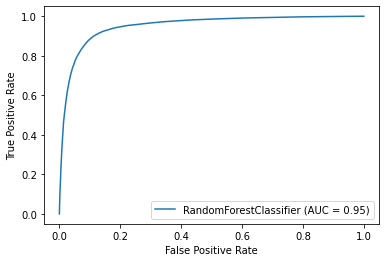

Random Forest score train:  1.0
Random Forest score:  0.9050725343199298


In [15]:
metrics.plot_roc_curve(random_forest, X_test, Y_test)                       # CURVA ROC
plt.show() 
print("Random Forest score train: ", random_forest.score(X_train, Y_train)) # score_train
print("Random Forest score: ", random_forest.score(X_test, Y_test))         # score_test

In [16]:
# función para guardar el modelo
def save_models(filename, model):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [17]:
save_models('../data/04_models/random_forest.pkl', random_forest ) # ruta y modelo guradado IMP .plk

### Referencias: 
- https://www.cienciadedatos.net/documentos/33_arboles_de_prediccion_bagging_random_forest_boosting-
- https://rpubs.com/Joaquin_AR/255596
- https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205
- https://empresas.blogthinkbig.com/ml-a-tu-alcance-matriz-confusion/
- https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/
- https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python
- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/